In [1]:
#LIBRARIES
import pandas as pd
import re
import numpy as np

## FUZZY
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

## nomalice parameters
from unidecode import unidecode

import spacy  # For preprocessing
from scipy import spatial
from time import time  # To time our operations
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

C:\Users\War\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## user to tranlate words

In [2]:

from deep_translator import GoogleTranslator
def translateString(to_translate, languageFinal):
    translated = GoogleTranslator(source='auto', target=languageFinal).translate(to_translate)
    return translated
def tranlateColum(dataFrame,columName,languageFinal):
    ## dataFrame Lengt
    total = dataFrame.shape[0]
    for i in range(0 ,total):
        to_translate = dataFrame[columName][i]
        translated = translateString(to_translate,languageFinal)
        print(i,translated)
        dataFrame[columName][i] = translated
    

ModuleNotFoundError: No module named 'deep_translator'

## nfinal data base

In [3]:

df = pd.read_excel("2_final_db.xlsx")


## se eliminan las perosonas sin job title 

In [4]:

dfa = df[df["job_title"].notna()] 
dfa = dfa.reset_index(drop = True) 
dfa.shape[0]
dfa["job_title"][0]

'Comédienne'

## se traduce al ingles todo y se guarda en su propio archivo

In [5]:

tranlateColum(dfa,"job_title","en")
dfa["job_title"][200]
dfa.to_excel("job_title_en.xlsx")

0 Actress
1 Company dedicated to
<ipython-input-2-c62399c7d936>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame[columName][i] = translated
2 Actress, singer-songwriter, Clown / Neztoile Rosa Tapioca, Souffleuse
3 Actress
4 Senior Javascript Developer
5 Director
6 Backend developer
7 Director
8 Full Stack Developer
9 Senior IOS Developer
10 Entrepreneur
11 Engineer
12 Student
13 Founder
14 English > Spanish Subtitler
15 Comedienne Consultant
16 Senior Devops Engineer
17 Receptionist
18 Makeup artist
19 Administration
20 IT Operation Analyst
21 Artist/Translator/Psychologist
22 Associate
23 Sales executive
24 iOS Developer
25 Senior iOS Engineer
26 Actress (Singer / Dancer)
27 Actress
28 Producer & Filmmaker
29 Sales Support Department - Junior Specialist
30 international and domestic trade
3

In [37]:
# cuales del la db original tienen valoes nulos, por columna

df.isnull().sum()

id                         0
regex_bootcamp             0
bootcamp                   0
match                    146
search                     0
certificate_authority    312
title                    310
cert_field_match         309
ratio                    293
job_title                 16
education                  5
certifications           224
about                    172
scraping_services_id       0
linkedin_id                0
linkedin_profile_url       0
last_name                  0
first_name                 0
v_extension                0
location                   0
company                    0
job_history               26
snapshots                  6
skills                    32
updated                    0
middle_name              261
num_connections          264
interests                283
volunteered              201
languages                 95
recommendations          321
publications             355
patents                  413
industry                 333
titles        

# Se carga los job titles en ingles 

In [7]:
EN_DF = pd.read_csv("job_title_en.xlsx")
EN_DF.shape

(399, 38)

## Cleaning and lemmatization of the job titles

In [3]:
nlp = spacy.load("en_core_web_sm")

def cleaning(text):
    ##text = text.lower()
    #text = text.replace('[>/,\.!?\-!?\n\)\(\r]', ' ') 
    text = re.sub("[^A-Za-z']+", ' ', str(text))
    doc = nlp(text)
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    #txt = [token.lemma_ for token in doc if not token.is_stop]
    txt = [tok.lemma_.lower() for tok in doc
                if not tok.is_stop and not tok.is_punct and tok.is_alpha ]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    return txt


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

## loading word vectors+
 ## TO A python dic

In [9]:

embeddings_dict = {}
# vectors dimention
DIMENTION_DIC = 300
# 6 billions words
#with open("glove.6B."+str(DIMENTION_DIC)+"d.txt", 'r', encoding="utf-8") as f:
# 42 Billion words
with open("glove.42B."+str(DIMENTION_DIC)+"d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        print(word)
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

ney/redi-meds
stalwartuk
st-amant
stamp-size
stanchorage
s.t.a.n.d.
standord
starfox64
starle
starmind
star-san
starselite
starsports
starspow
starsshineonme
start/continue
start.html
starthtml
star-type
starvox
starwagon
stasso
state10
statec
statementlicense
state.now
state-reported
states10/10/2012
statesquick
statesthere
states.washington
state_type
stateview
stathams
station/bryan
stationthis
statkevich
statsanswersboardvideos
statti
stay-awake
staybeautiful
stboise
std100
stduluth
steamfunk
steapon
steece
steelers/ravens
steelroots
stefanibags.com
steinhour
stellenbosh
step.if
stepkother
stepo
stepsjoincontact
step-step
stepups
steri-fab
sterioids
sterlinglogin
sternn
steroided
stevn
stgc
sthd
stnto
stock11
stock.estimated
stockfinster
stockholme
stockpickers
stockpiler
stocks.com
stockwarning
stocs
stokeham
stoke-on
stolder
stommelen
stone-covered
stooop
stopgame
stop/limit
storandt
storesbusinesses
stormclan
störmer
storm-relative
storyfebruary
story?follow
storywriters
stossel

In [10]:
## ordena la spalabras dependiendo de la distancia euclidiana en el n-space
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

## method to get word/vector from dictionary
def getVectorWord(dictionary, word):
    if word in dictionary:
        return dictionary[word]
    else :
        return np.zeros(DIMENTION_DIC)


## se buscan las palabras mas cercanas 
### manager
### developer
### artist

In [11]:
print(find_closest_embeddings(embeddings_dict["manager"])[:10])
print(find_closest_embeddings(embeddings_dict["developer"])[:10])
print(find_closest_embeddings(embeddings_dict["artist"])[:10])

['manager', 'assistant', 'management', 'administrator', 'supervisor', 'coordinator', 'consultant', 'managers', 'director', 'managing']
['developer', 'developers', 'programmer', 'appsex-next', 'architect', 'development', 'consultant', 'opportunitiesjava', 'engineer', 'providersopen-source']
['artist', 'artists', 'musician', 'painter', 'art', 'playlistsalbum', 'artwork', 'sculptor', 'songwriter', 'works']


## word math, sumando vectores
### software + developer + ui
### software + developer + art
### software + developer - ui

In [12]:

print(find_closest_embeddings(embeddings_dict["software"] + embeddings_dict["developer"]+ embeddings_dict["ui"])[:7])
print(find_closest_embeddings(embeddings_dict["software"] + embeddings_dict["developer"]+ embeddings_dict["art"])[:7])
print(find_closest_embeddings(embeddings_dict["software"] + embeddings_dict["developer"]- embeddings_dict["ui"])[:7])

['software', 'developer', 'ui', 'developers', 'application', 'microsoft', 'java']
['software', 'developer', 'design', 'art', 'development', 'web', 'computer']
['software', 'developer', 'enterprise', 'solutions', 'microsoft', 'manager', 'consulting']


In [13]:
print(find_closest_embeddings(embeddings_dict["hand"] + embeddings_dict["finger"]- embeddings_dict["ring"])[:7])

['finger', 'hand', 'fingers', 'hands', 'thumb', 'fingertips', 'toes']


In [14]:
tsne = TSNE(n_components=2, random_state=0)
words =  list(["developer","front-end","sales","art","politics","math","calculator"])
vectors = [embeddings_dict[word] for word in words]

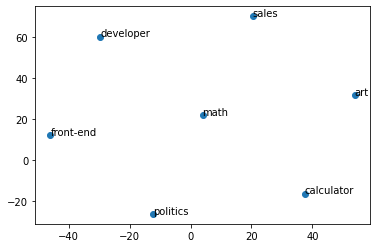

In [15]:
Y = tsne.fit_transform(vectors[:100])
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

In [16]:
## tranform profiles to vectors
profilesVectors = []
for index in range(0,len(EN_DF['job_title'])):
    row = EN_DF['job_title'][index]
    cleaned = cleaning(row)
    nVectors = [np.zeros(DIMENTION_DIC)]
    if len(cleaned) > 0:
        nVectors  = [ getVectorWord(embeddings_dict,word) for word in cleaned]
    
        
    #print(len(nVectors),len(cleaned))
    sumVector = np.add.reduce(nVectors)
   
            
    #print(type(sumVector))
    profilesVectors.append(sumVector)

In [17]:
len(profilesVectors)

399

In [18]:
len(EN_DF['job_title'])


399

In [19]:
print(find_closest_embeddings(profilesVectors[200])[1:9])
print(EN_DF.loc[200])

['marketing', 'branding', 'business', 'communications', 'management', 'networking', 'innovation', 'corporate']
Unnamed: 0                                                             200
id                                                                49226477
regex_bootcamp                                                     ac.mica
bootcamp                                                           Acámica
match                                                                  NaN
search                                                          cert_regex
certificate_authority                                              acamica
title                                               fundamentos del diseño
cert_field_match                                                 authority
ratio                                                                  NaN
job_title                                Branding & Communication for SMEs
education                [{'summary': 'Al presente, primer año d

In [20]:
print(find_closest_embeddings(profilesVectors[197])[1:9])
print(EN_DF.loc[197])


['developer', 'developers', 'microsoft', 'application', 'development', 'web', 'manager', 'enterprise']
Unnamed: 0                                                             197
id                                                                17882002
regex_bootcamp                                                     ac.mica
bootcamp                                                           Acámica
match                                                                  NaN
search                                                          cert_regex
certificate_authority                                              acamica
title                                     programación orientada a objetos
cert_field_match                                                 authority
ratio                                                                  NaN
job_title                                               Software Developer
education                [{'education_org': 'Instituto tecnológico de C.

In [21]:
## seleccionando el numero de categorias a mano
TOTAL_CATEGORIES = 10
kmeans = KMeans(n_clusters=TOTAL_CATEGORIES, random_state=0).fit(profilesVectors)

In [22]:
for i in range(0,len(kmeans.cluster_centers_)):
    print(find_closest_embeddings(kmeans.cluster_centers_[i])[:5])

['developer', 'developers', 'software', 'web', 'application']
['actress', 'actor', 'singer', 'actors', 'starring']
['management', 'development', 'business', 'services', 'information']
['payexercisedmr', 'x3creative', 'www.a-liveprivates.com', 'cnthefishsite.cn5m', 'lenders/consultant']
['work', 'one', 'that', 'development', 'design']
['engineer', 'software', 'engineering', 'manager', 'technical']
['management', 'business', 'manager', 'services', 'software']
['director', 'business', 'as', 'the', 'that']
['team', 'football', 'league', 'soccer', 'coach']
['manager', 'management', 'business', 'consultant', 'director']


In [23]:
len(embeddings_dict.keys())

1917494

In [24]:
kmeans.labels_

array([1, 3, 1, 1, 0, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 5, 3, 1, 3, 9, 4,
       3, 9, 0, 5, 1, 1, 1, 2, 9, 2, 4, 5, 4, 5, 3, 3, 1, 9, 3, 5, 1, 9,
       1, 3, 3, 3, 3, 4, 1, 1, 3, 3, 0, 9, 9, 7, 3, 0, 2, 3, 0, 4, 1, 0,
       1, 4, 1, 1, 0, 0, 7, 1, 9, 1, 3, 1, 4, 3, 3, 0, 0, 1, 3, 1, 1, 3,
       9, 2, 1, 0, 3, 3, 1, 7, 9, 0, 9, 5, 7, 1, 9, 3, 7, 1, 2, 5, 5, 9,
       9, 2, 3, 9, 5, 1, 1, 0, 3, 1, 1, 3, 1, 9, 5, 1, 9, 3, 6, 1, 2, 1,
       9, 1, 0, 1, 4, 3, 1, 2, 4, 3, 3, 3, 3, 9, 9, 1, 9, 1, 5, 0, 2, 9,
       7, 9, 0, 2, 1, 1, 3, 4, 9, 0, 4, 9, 4, 9, 4, 3, 9, 1, 1, 3, 4, 9,
       9, 0, 9, 3, 1, 4, 3, 1, 9, 4, 4, 0, 5, 9, 2, 3, 4, 3, 0, 0, 3, 0,
       9, 0, 4, 4, 4, 4, 4, 5, 0, 3, 4, 0, 4, 9, 0, 0, 5, 3, 5, 5, 5, 2,
       3, 3, 0, 0, 5, 6, 5, 2, 5, 5, 0, 5, 9, 5, 3, 9, 5, 5, 0, 0, 6, 0,
       4, 0, 0, 0, 0, 3, 0, 5, 6, 3, 5, 9, 9, 4, 4, 4, 3, 3, 9, 9, 3, 9,
       4, 3, 4, 9, 4, 3, 3, 9, 2, 9, 9, 0, 3, 3, 3, 9, 9, 0, 3, 7, 3, 9,
       3, 3, 0, 5, 9, 3, 2, 4, 9, 7, 3, 4, 3, 3, 3,

In [25]:
len(kmeans.labels_)

399

In [30]:
TOTAL_CLUSTERS = 12
dicC = {}
for clust in range(2, TOTAL_CLUSTERS+1):
    kmeans = KMeans(n_clusters=clust, random_state=0).fit(profilesVectors)
    dicC["index-c"+str(clust)] = kmeans.labels_
    for index in range(0,len(kmeans.cluster_centers_)):
        print(index," - ",find_closest_embeddings(kmeans.cluster_centers_[index])[:6])
    print("------------------------------------------\n")

0  -  ['management', 'business', 'development', 'manager', 'services', 'software']
1  -  ['developer', 'manager', 'consultant', 'working', 'development', 'based']
------------------------------------------

0  -  ['noted', 'www.a-liveprivates.com', 'explains', 'www.a-maturescam.com', 'meanwhile', 'www.a-livesexasian.com']
1  -  ['management', 'business', 'development', 'services', 'as', 'that']
2  -  ['manager', 'developer', 'development', 'management', 'software', 'engineer']
------------------------------------------

0  -  ['management', 'business', 'development', 'services', 'company', 'that']
1  -  ['manager', 'management', 'director', 'business', 'assistant', 'development']
2  -  ['developer', 'software', 'web', 'developers', 'development', 'application']
3  -  ['www.a-liveprivates.com', 'www.a-maturescam.com', 'www.a-livesexasian.com', 'www.a-cameraboys.com', 'meanwhile', 'noted']
------------------------------------------

0  -  ['actress', 'actor', 'singer', 'actors', 'starrin

In [31]:
JOB_CLUS_DF = pd.DataFrame(data=dicC)
print(JOB_CLUS_DF)

     index-c2  index-c3  index-c4  index-c5  index-c6  index-c7  index-c8  \
0           1         0         3         0         1         5         0   
1           1         0         3         4         0         1         1   
2           1         0         3         0         1         5         0   
3           1         0         3         0         1         5         0   
4           1         2         2         1         4         4         7   
..        ...       ...       ...       ...       ...       ...       ...   
394         1         0         3         4         0         1         1   
395         1         2         2         1         4         4         7   
396         1         0         3         4         0         1         1   
397         1         0         3         4         0         1         1   
398         0         2         2         1         4         4         7   

     index-c9  index-c10  index-c11  index-c12  
0           4          1  

In [34]:
JOB_CLUS_DF.to_excel("index-by-cluster.xlsx",index=False)

In [36]:
EN_DF

,Unnamed: 0,id,regex_bootcamp,bootcamp,match,search,certificate_authority,title,cert_field_match,ratio,...,interests,volunteered,languages,recommendations,publications,patents,industry,titles,company_name_complete,job_title_complete
0,0,44091833,pygmalion,Pygmalion,studio pygmalion,educ_regex,NaN,NaN,NaN,NaN,...,NaN,NaN,"['Français', 'Anglais', 'Espagnol']",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,65755502,laborat.ria,Laboratoria,laboratoria a.s.,educ_regex,NaN,NaN,NaN,NaN,...,NaN,"[{'causes': ['Children', 'Education', 'Environ...","['Español', 'Ingles- básico']",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,24191705,pygmalion,Pygmalion,1995 : studio pygmalion –pascal luneau-luc tey...,educ_regex,NaN,NaN,NaN,NaN,...,"['Poésie', 'lecture', 'tarot', 'traduction', '...",NaN,"['Français', 'Espagnol', 'Anglais', 'Italien']",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,49371071,pygmalion,Pygmalion,pygmalion,educ_regex,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Performing Arts,NaN,NaN,NaN
4,4,49105504,ac.mica,Acámica,codecademy/acamica,educ_regex,NaN,NaN,NaN,NaN,...,NaN,NaN,"['Spanish', 'English']",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,394,46810892,laborat.ria,Laboratoria,NaN,about_fs,NaN,NaN,NaN,100.0,...,['Nevenactiviteiten: onderhoud en reparatie va...,NaN,"['Dutch', 'English', 'German', 'French']",['Hans is een gedreven adviseur. Hij is goed i...,NaN,NaN,NaN,NaN,NaN,NaN
395,395,63704926,icreate[ -]?limited|icreate|icreate[ -]?coding...,iCreate Coding Academy,NaN,about_regex,NaN,NaN,NaN,NaN,...,"['computing', 'new technologies', 'social acti...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,396,59233846,keep.?coding|keep.?coding.io,Keep Coding,NaN,about_regex,NaN,NaN,NaN,NaN,...,"['Informatica', 'Telefonia', 'nuevas tecnologi...","[{'causes': ['Animal Welfare', 'Environment', ...","['English', 'Spanish']","['Podcaster de corazón, gran locución, consigu...",NaN,NaN,NaN,NaN,NaN,NaN
397,397,54833715,reprograma,Reprograma,NaN,about_regex,NaN,NaN,NaN,NaN,...,"['arte: pintura y la música', 'así de simple.....",NaN,"['Español', 'italiano', '', 'frances', 'inglés']",NaN,"[{'authors': [{'full_name': 'María Basile', 'u...",NaN,NaN,NaN,NaN,NaN
